In [40]:
# TP 2 - Options américaines (reprendre le TP2 au début)

import numpy as np

n = 10 # nombre d'étapes
T = 10 # temps final
deltat = T/n # pas de temps
S0 = 100 # prix initial
# sigma = 0.1 # volatilité
up = 1.15 # up
down = 1/up # down

# taux d'intérêt et facteur d'actualisation
r = 0.1
R = np.exp(r*deltat)

# probabilité risque neutre
p = (R-down)/(up-down)

print("p =",p)

p = 0.8401443590294416


In [41]:
# matrice des prix de l'actif (TP1)
def CRR(n,down,up,S0):
    S = np.zeros((n+1,n+1))
    S[0,0] = S0
    for i in range(n):
        S[i+1,0] = S[i,0]*down
        for j in range(i+1):
            S[i+1,j+1] = S[i,j]*up
    return S


In [42]:
S = CRR(n,down,up,S0)
S

array([[100.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [ 86.95652174, 115.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [ 75.61436673, 100.        , 132.25      ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [ 65.75162324,  86.95652174, 115.        , 152.0875    ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [ 57.17532456,  75.61436673, 100.        , 132.25      ,
        174.900625  ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ],
       [ 49.71767353,  65.75162324,  86.95652174, 115.        ,
        152.0875    , 201.13571875,   0. 

In [37]:
# paramètres de l'option
K = S0 # strike (ici, option à la "monnaie")

def payoffcall(S,K):
    phicall = max(S-K,0) # option d'achat
    return phicall

def payoffput(S,K):
    phiput = max(K-S,0) # option de vente
    return phiput


In [45]:
# évaluation du prix d'un call européen par récurrence rétrograde
C = np.zeros((n+1,n+1))
for j in range(n+1):
    C[n,j] = payoffcall(S[n,j],K)
for i in range(n-1,-1,-1):
    for j in range(i+1):
        C[i,j] = (p*C[i+1,j+1]+(1-p)*C[i+1,j])/R
C[6,2]

25.11239014419344

In [46]:
print("La prime du contrat call européen vaut C0 =",C[0,0])

La prime du contrat call européen vaut C0 = 72.18448721712731


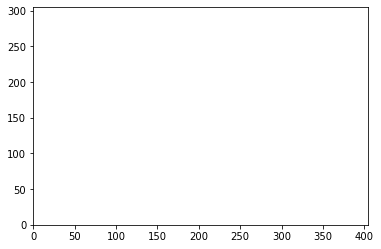

In [7]:
# librairies graphiques
import matplotlib.pyplot as plt
import matplotlib.collections as mc

# liste des couples de points
lines = []
for i in range(0,n+1,20):
    for j in range(i):
        lines.append([(S[i,j],C[i,j]),(S[i,j+1],C[i,j+1])])

# plot
lc = mc.LineCollection(lines, cmap=plt.cm.rainbow, linewidths=2)
fig,ax = plt.subplots()
ax.set_xlim(0,S.max())
ax.set_ylim(0,C.max())
ax.add_collection(lc)
plt.show()


In [8]:
# évaluation du prix d'un call américain par récurrence rétrograde
CA = np.zeros((n+1,n+1))
for j in range(n+1):
    CA[n,j] = payoffcall(S[n,j],K)
for i in range(n-1,-1,-1):
    for j in range(i+1):
        CA[i,j] = max(payoffcall(S[i,j],K),(p*CA[i+1,j+1]+(1-p)*CA[i+1,j])/R)


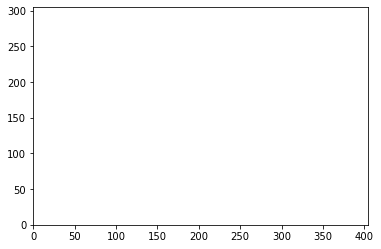

In [9]:
# on représente l'option américaine en fonction du prix de l'actif
lines = []
for i in range(0,n+1,20):
    for j in range(i):
        lines.append([(S[i,j],CA[i,j]),(S[i,j+1],CA[i,j+1])])

# plot
lc = mc.LineCollection(lines, cmap=plt.cm.rainbow, linewidths=2)
fig,ax = plt.subplots()
ax.set_xlim(0,S.max())
ax.set_ylim(0,C.max())
ax.add_collection(lc)
plt.show()


In [10]:
# put européen
P = np.zeros((n+1,n+1))
for j in range(n+1):
    P[n,j] = payoffput(S[n,j],K)
for i in range(n-1,-1,-1):
    for j in range(i+1):
        P[i,j] = (p*P[i+1,j+1]+(1-p)*P[i+1,j])/R

# put américain
PA = np.zeros((n+1,n+1))
for j in range(n+1):
    PA[n,j] = payoffput(S[n,j],K)
for i in range(n-1,-1,-1):
    for j in range(i+1):
        PA[i,j] = max(payoffput(S[i,j],K),(p*PA[i+1,j+1]+(1-p)*PA[i+1,j])/R)


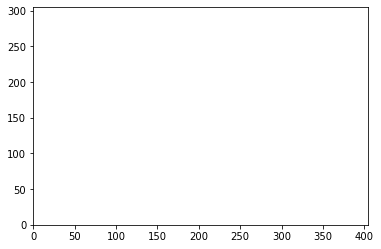

In [11]:
# on représente le put européen en fonction du prix de l'actif
lines = []
for i in range(0,n+1,20):
    for j in range(i):
        lines.append([(S[i,j],P[i,j]),(S[i,j+1],P[i,j+1])])

# plot
lc = mc.LineCollection(lines, cmap=plt.cm.rainbow, linewidths=2)
fig,ax = plt.subplots()
ax.set_xlim(0,S.max())
ax.set_ylim(0,C.max())
ax.add_collection(lc)
plt.show()


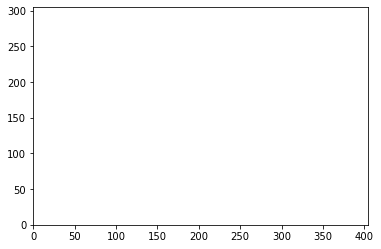

In [12]:
# on représente le put américain en fonction du prix de l'actif
lines = []
for i in range(0,n+1,20):
    for j in range(i):
        lines.append([(S[i,j],PA[i,j]),(S[i,j+1],PA[i,j+1])])

# plot
lc = mc.LineCollection(lines, cmap=plt.cm.rainbow, linewidths=2)
fig,ax = plt.subplots()
ax.set_xlim(0,S.max())
ax.set_ylim(0,C.max())
ax.add_collection(lc)
plt.show()


In [27]:
print('Les primes sont: call européen:',C[0,0],' - call américain:',CA[0,0])
print('Les primes sont: put européen:',P[0,0],' - put américain:',PA[0,0])

price = S0*down**(4)*up**2

payoffput(price,K)
price


Les primes sont: call européen: 63.231005494781684  - call américain: 63.231005494781684
Les primes sont: put européen: 0.018949611925903057  - put américain: 2.156126698056177


75.61436672967865

In [17]:
# frontière d'exercice du put américain
EPA = 3*np.ones((n+1,n+1)) # 0 si on attend, 1 si on exerce
for j in range(n+1):
    if S[n,j]<=K:
        EPA[n,j]=1
    else:
        EPA[n,j]=0
for i in range(n-1,-1,-1):
    for j in range(i+1):
        if payoffput(S[i,j],K) > (p*PA[i+1,j+1]+(1-p)*PA[i+1,j])/R:
            EPA[i,j]=1
        else:
            EPA[i,j]=0


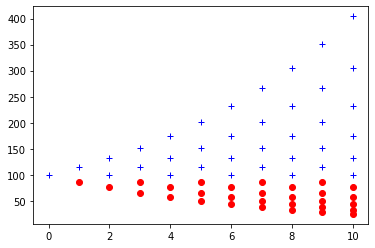

In [18]:
for i in range(n+1):
    for j in range(i+1):
        if EPA[i,j]==1: # exercice anticipé
            plt.plot(i,S[i,j],'ro')
        else: # on attend (pas d'exercice anticipé)
            plt.plot(i,S[i,j],'b+')


In [19]:
# recherche de la frontière
F = np.zeros(n+1) # prix correspondant à l'indice maximal de la zone rouge
for i in range(n+1):
    prixrouge = S[i,EPA[i,:]==1] # prix de la zone rouge
    if prixrouge.size>0:
        F[i] = np.amax(prixrouge) # on récupère le prix max des rouges
F

array([ 0.        , 86.95652174, 75.61436673, 86.95652174, 75.61436673,
       86.95652174, 75.61436673, 86.95652174, 75.61436673, 86.95652174,
       75.61436673])

In [ ]:
# on dessine la frontière rouge
indice = np.amin(np.nonzero(F)) # indice temporel du début de la zone rouge
plt.plot(range(indice,n+1),F[indice:n+1])